<a href="https://colab.research.google.com/github/siddheshabhang/Obesity-Risk-Classifier/blob/master/MT2025121_MT2025005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIT-511 Machine Learning Project 1**
---
### **Problem Description :**
An individual's weight category is a complex outcome influenced by a wide array of factors, including lifestyle, dietary habits, physical activity, technology use, and demographic/hereditary data. This project addresses the challenge of modeling this intricate relationship to understand the key drivers of weight status and obesity.

### **Objective :**
* The goal is to develop an accurate machine learning model to predict whether an individual's weight category is Inadequate, Normal, Overweight, or Obese. This will be achieved by:

* Analyzing and preprocessing a comprehensive dataset of lifestyle and health indicators.

* Engineering and selecting the most significant predictive features.

* Building, training, and optimizing various classification models to find the best performer.

* Using the final model to identify key risk factors, providing actionable insights into the drivers of obesity and overweight conditions.
---


# **Importing Libraries and Loading the Data**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
url = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/master/Obesity_Risk%20Dataset/train.csv"
train_df = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/d3da3b9935687478f9039ed9773199f505e55f3d/Obesity_Risk%20Dataset/test.csv"
test_df = pd.read_csv(url2)
test_ids = test_df['id']


In [44]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [45]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,Female,19.007177,1.772449,137.852618,yes,yes,3.000000,3.000000,Sometimes,no,2.007348,no,1.465931,0.813235,Sometimes,Public_Transportation
1,15534,Female,21.572114,1.698346,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.577824,1.865851,Sometimes,Public_Transportation
2,15535,Male,22.285024,1.737453,82.000000,yes,yes,2.000000,2.720642,Sometimes,no,1.830614,no,0.451009,0.000000,Sometimes,Public_Transportation
3,15536,Male,30.916426,1.775580,120.860386,yes,yes,2.712747,3.000000,Sometimes,no,2.144368,no,0.712726,0.100048,Sometimes,Automobile
4,15537,Female,18.000000,1.670000,65.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation


In [46]:
print(train_df.shape)
train_df.info()

(15533, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                 

In [47]:
print(test_df.shape)
test_df.info()

(5225, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-null   float64
 12  SCC                    

---
# **Exploratory Data Analysis (EDA)**
---

In [48]:
train_df.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [49]:
train_df.duplicated().sum()

np.int64(0)

In [50]:
train_df.duplicated().sum()

np.int64(0)

In [51]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'WeightCategory'

Distribution of the Target Variable (WeightCategory):
WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64


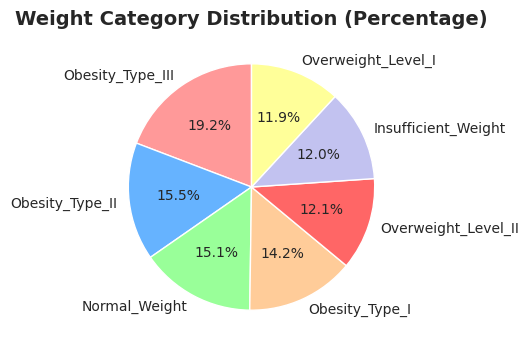

In [52]:
# Set style for plots
sb.set(style="whitegrid")

# 1. Analyze the Target Variable (WeightCategory)
print("Distribution of the Target Variable (WeightCategory):")
target_counts = train_df['WeightCategory'].value_counts()
print(target_counts)

plt.figure(figsize=(4, 4))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0', '#ffff99']
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})

plt.title('Weight Category Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.savefig('weight_category_distribution.png')
plt.show()


Statistical Summary of Numerical Features:
                Age        Height        Weight          FCVC           NCP  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean      23.816308      1.699918     87.785225      2.442917      2.760425   
std        5.663167      0.087670     26.369144      0.530895      0.706463   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.630927     66.000000      2.000000      3.000000   
50%       22.771612      1.700000     84.000000      2.342220      3.000000   
75%       26.000000      1.762921    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  
mean       2.027626      0.976968      0.613813  
std        0.607733      0.836841      0.602223  
min        1.000000      0.000000      0.000

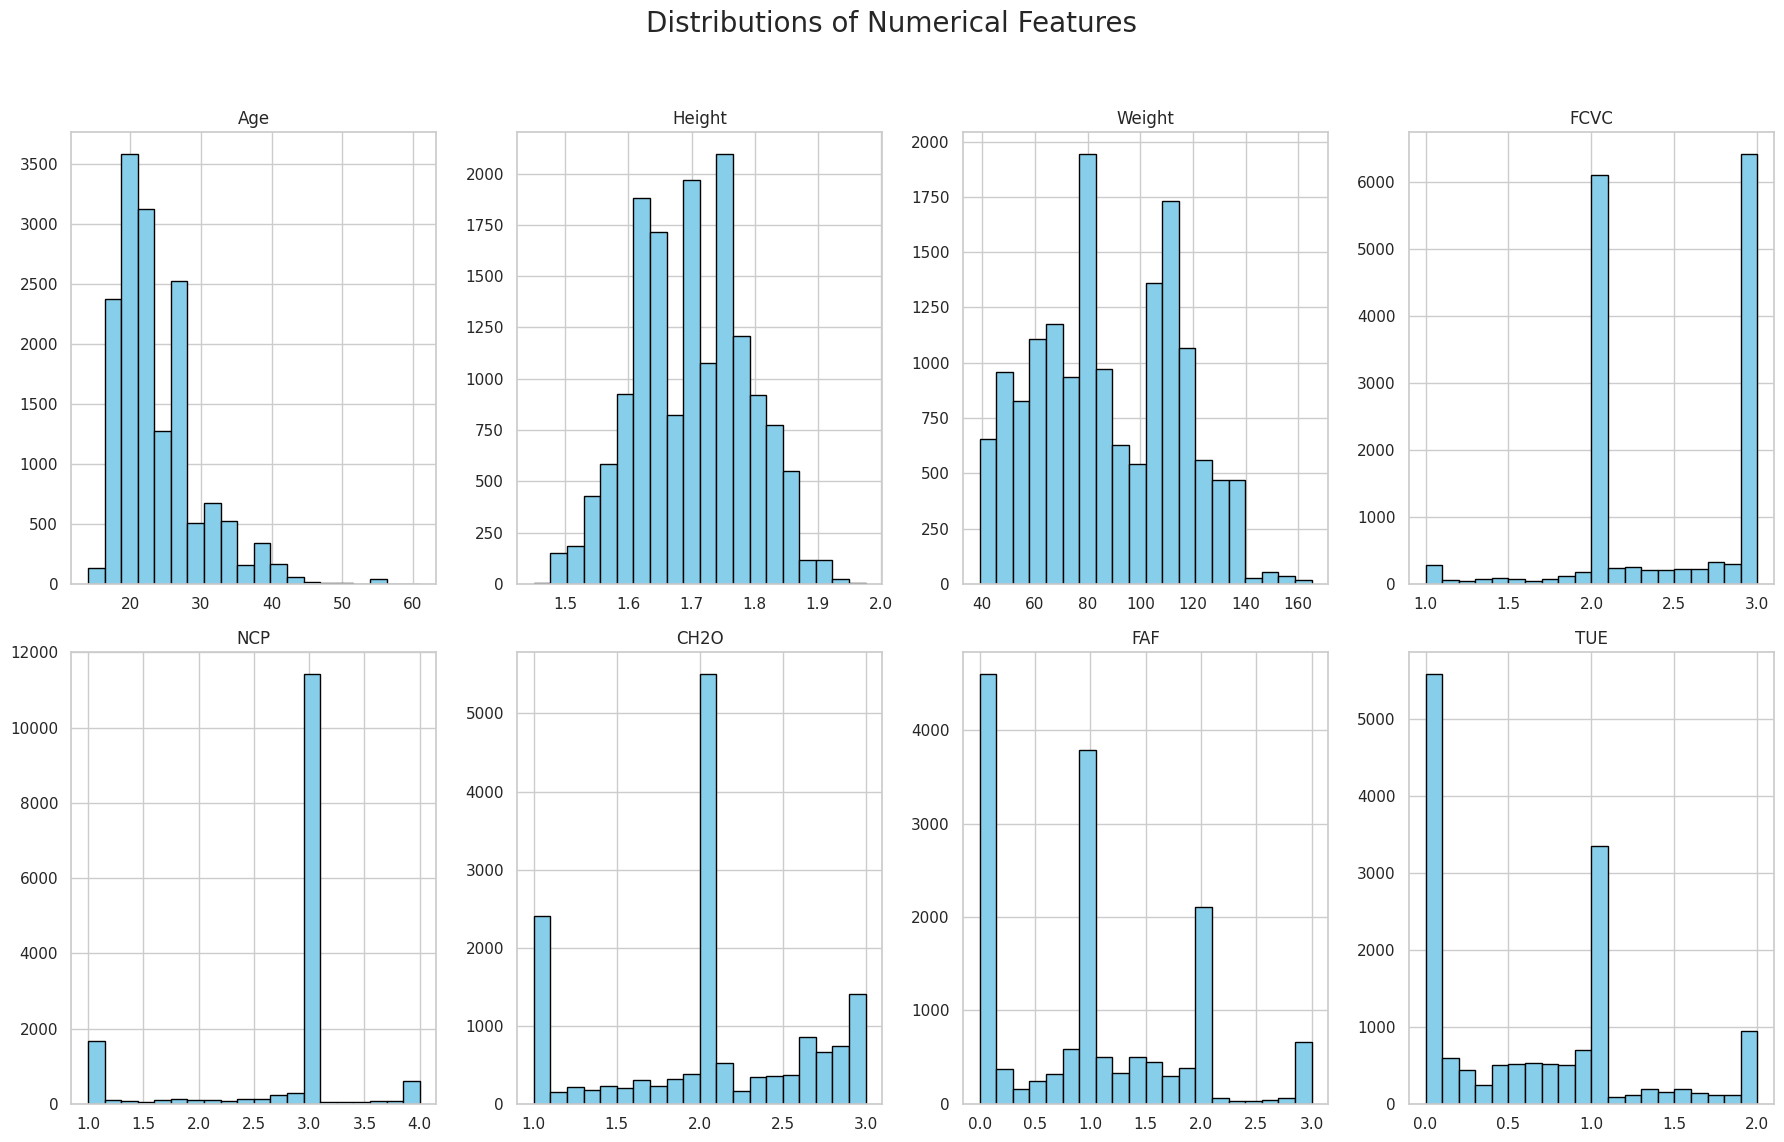

In [53]:
# 2. Analysis of Numerical Features

print("\nStatistical Summary of Numerical Features:")
print(train_df[numerical_cols].describe())
print("\n")

train_df[numerical_cols].hist(bins=20, figsize=(18, 12), layout=(2, 4), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Distributions of Categorical Features:


/tmp/ipython-input-2160425929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=train_df, x=col, palette='pastel')
/tmp/ipython-input-2160425929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=train_df, x=col, palette='pastel')
/tmp/ipython-input-2160425929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=train_df, x=col, palette='pastel')
/tmp/ipython-input-2160425929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

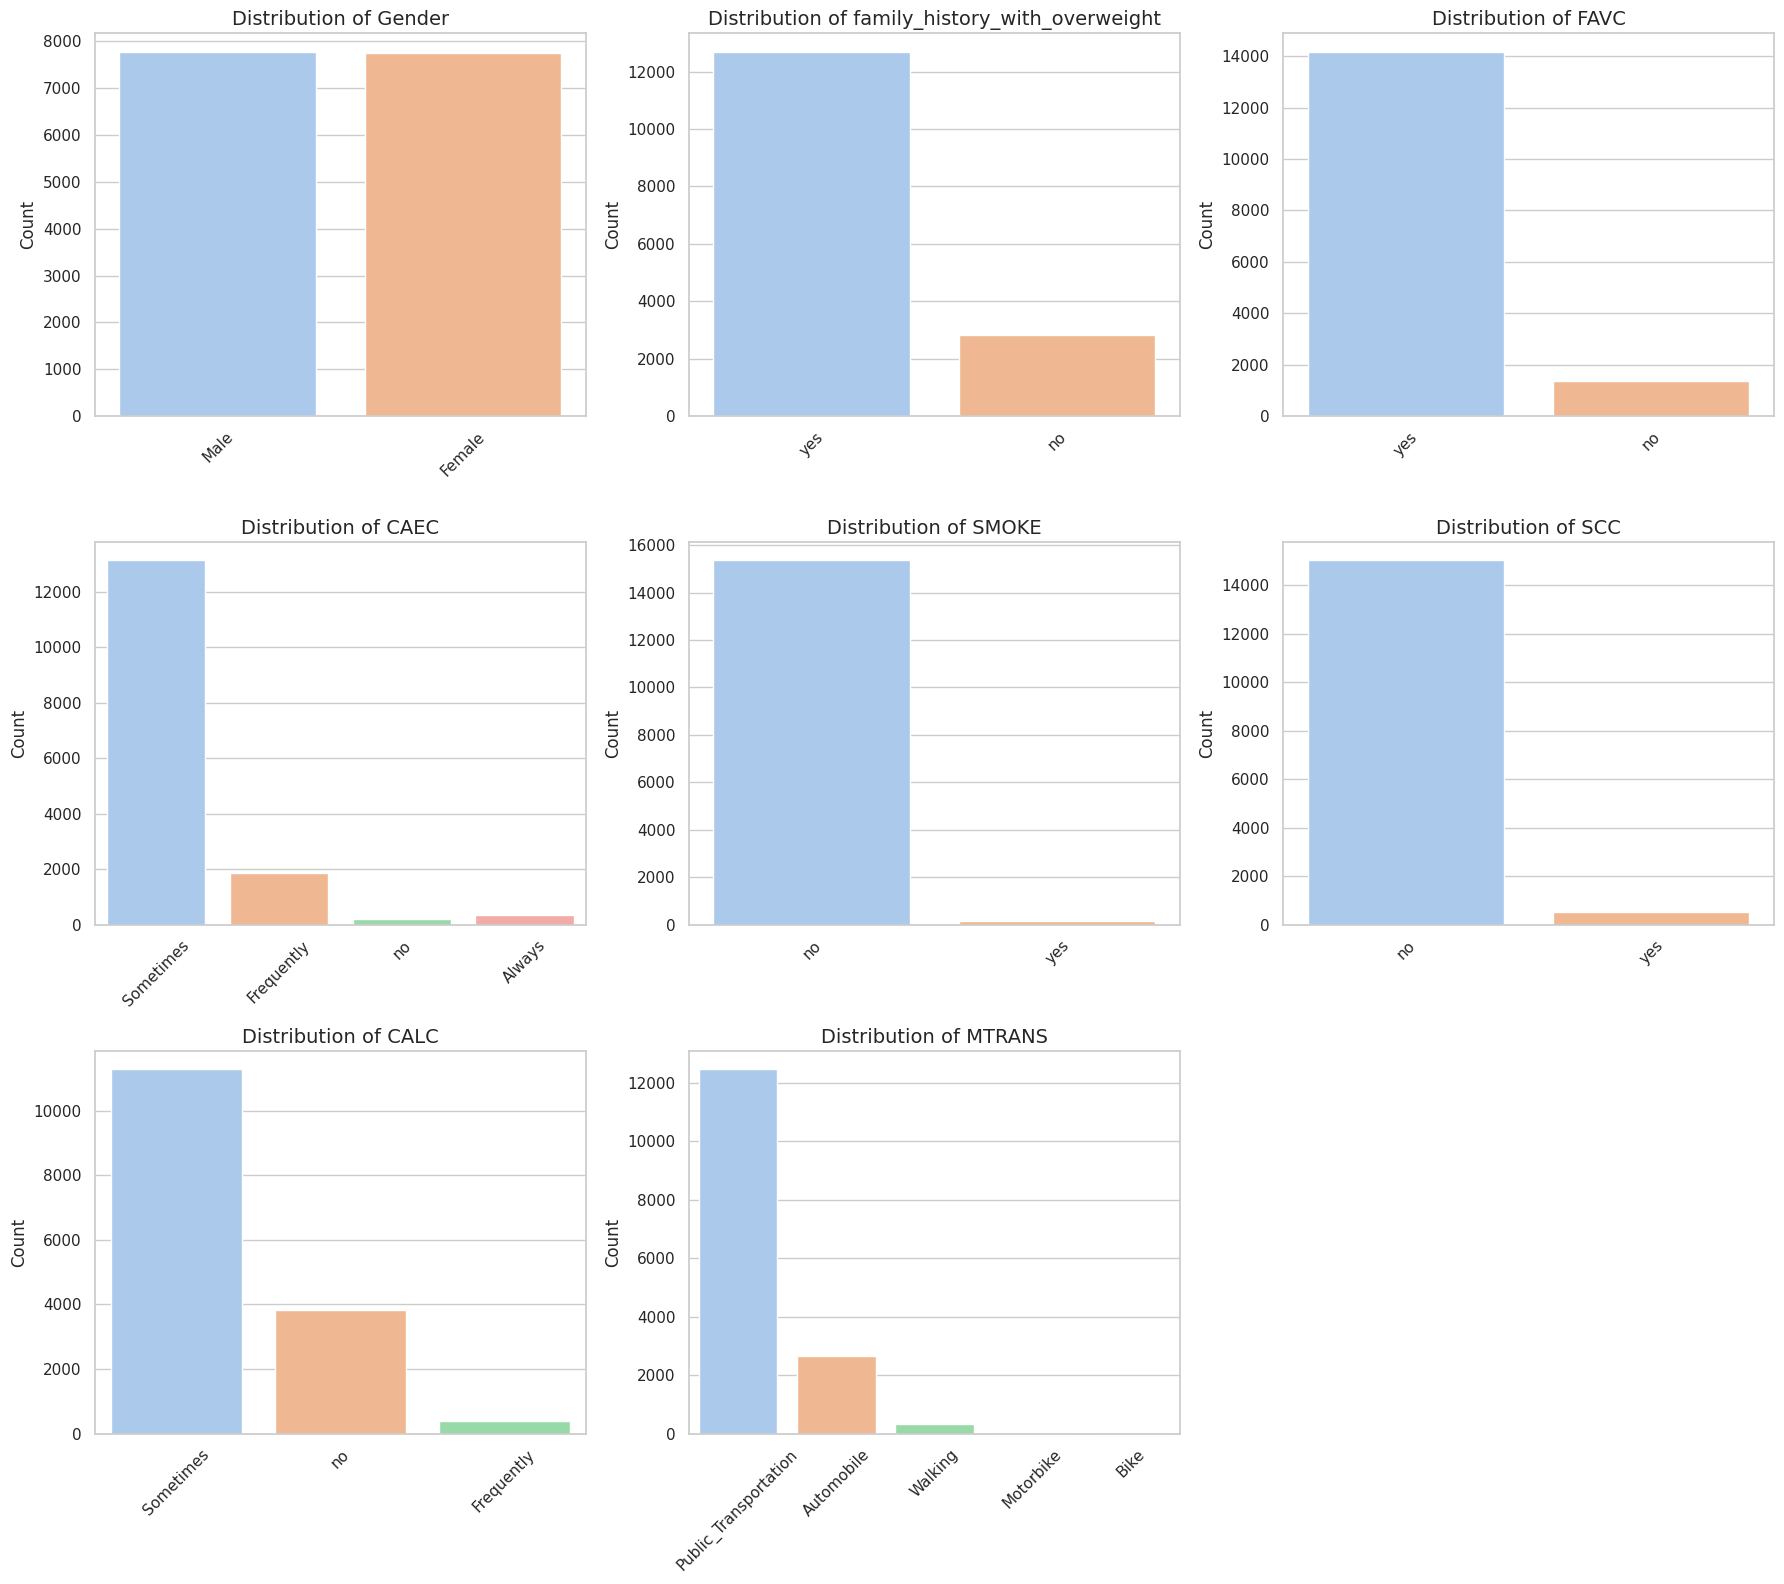

In [54]:
# 3. Analysis of Categorical Features

print("\nDistributions of Categorical Features:")
plt.figure(figsize=(18, 16))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sb.countplot(data=train_df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(None)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Between Numerical Features:


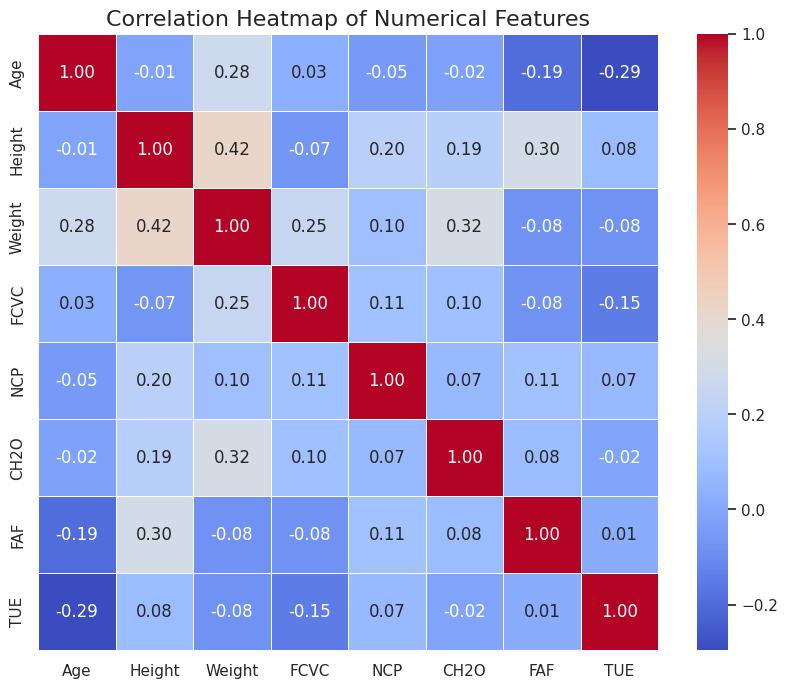

In [55]:
# 4a. Correlation Heatmap (Numerical Features)
print("\nCorrelation Between Numerical Features:")
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


Numerical Features vs. Target (WeightCategory):


/tmp/ipython-input-934628278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=train_df, x='WeightCategory', y=col, palette='muted')
/tmp/ipython-input-934628278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=train_df, x='WeightCategory', y=col, palette='muted')
/tmp/ipython-input-934628278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=train_df, x='WeightCategory', y=col, palette='muted')
/tmp/ipython-input-934628278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

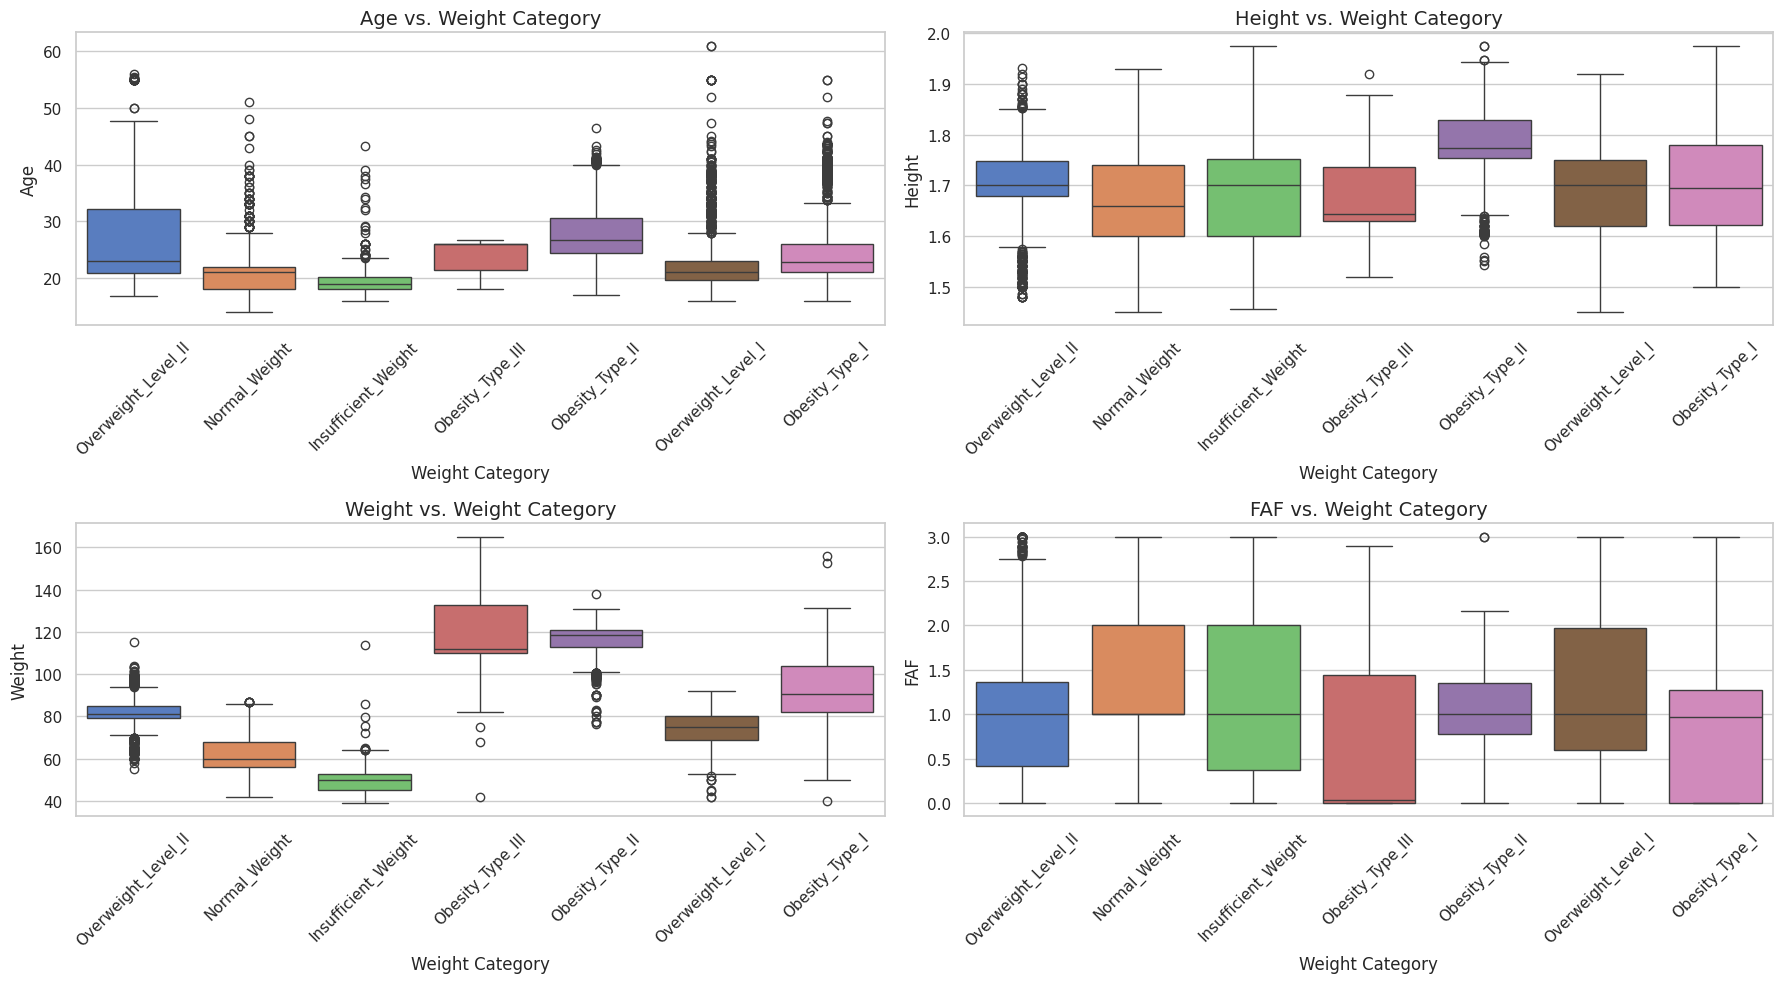

In [56]:
# 4b. Numerical Features vs. Target (WeightCategory)
print("\nNumerical Features vs. Target (WeightCategory):")
features_to_plot = ['Age', 'Height', 'Weight', 'FAF'] # FAF = Physical activity frequency
plt.figure(figsize=(18, 10))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(data=train_df, x='WeightCategory', y=col, palette='muted')
    plt.title(f'{col} vs. Weight Category', fontsize=14)
    plt.xlabel('Weight Category')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Categorical Features vs. Target (WeightCategory):


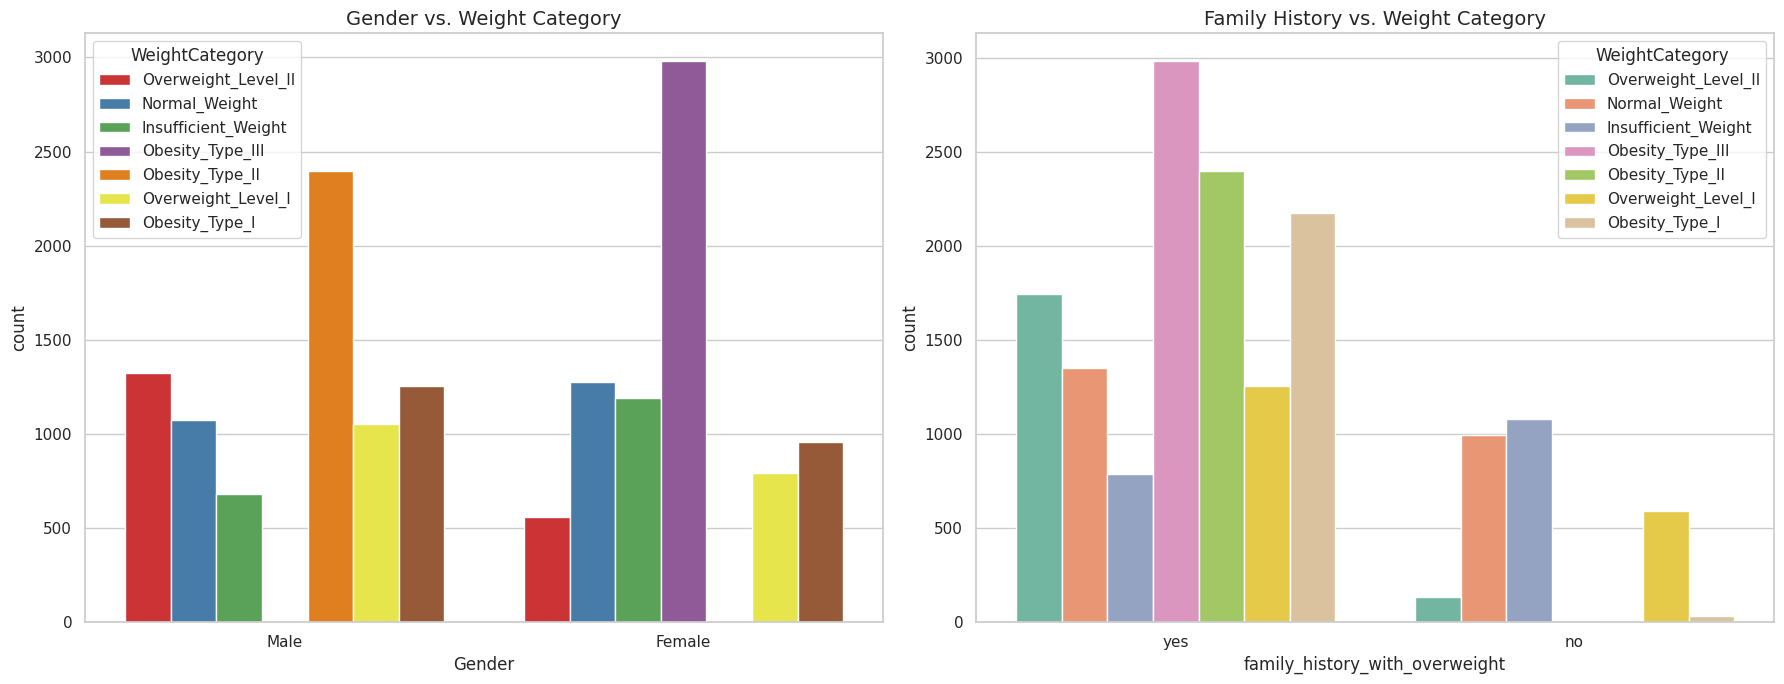

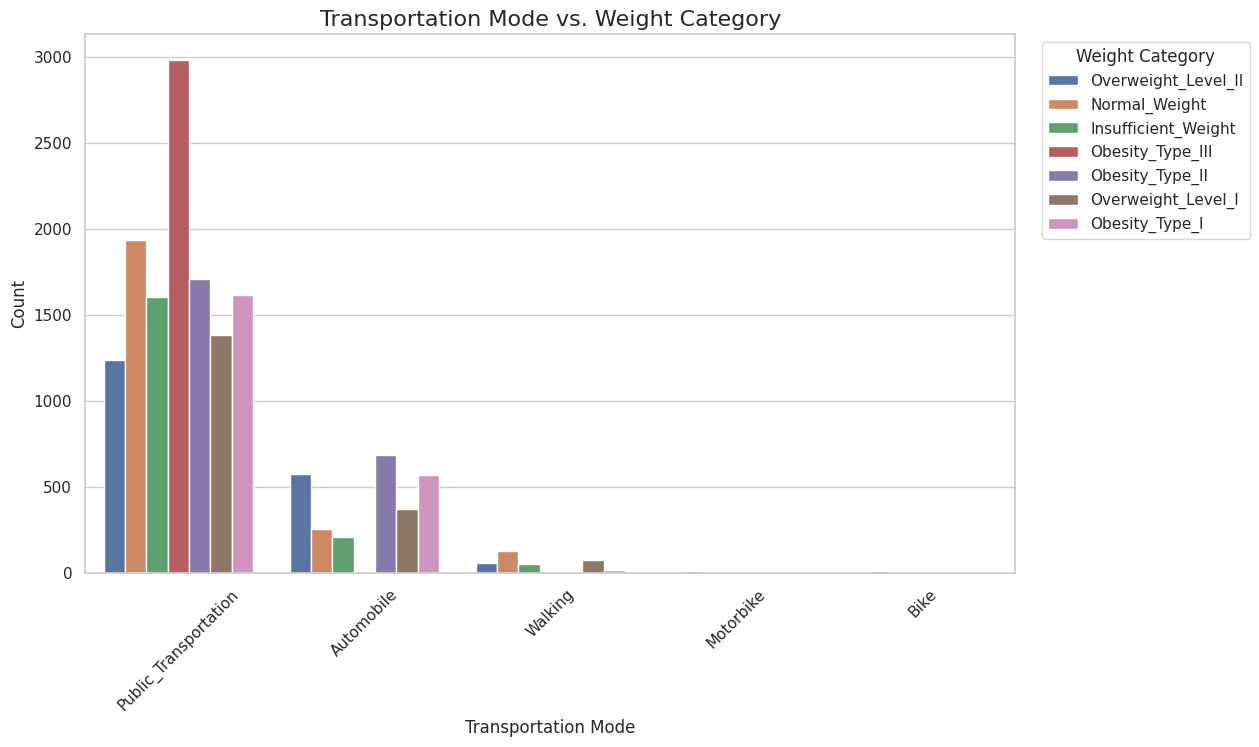

In [57]:
# 4c. Categorical Features vs. Target (WeightCategory)
print("\nCategorical Features vs. Target (WeightCategory):")
plt.figure(figsize=(18, 7))

# Gender vs WeightCategory
plt.subplot(1, 2, 1)
sb.countplot(data=train_df, x='Gender', hue='WeightCategory', palette='Set1')
plt.title('Gender vs. Weight Category', fontsize=14)

# family_history_with_overweight vs WeightCategory
plt.subplot(1, 2, 2)
sb.countplot(data=train_df, x='family_history_with_overweight', hue='WeightCategory', palette='Set2')
plt.title('Family History vs. Weight Category', fontsize=14)

plt.tight_layout()
plt.show()

# MTRANS vs WeightCategory (this one is often very insightful)
plt.figure(figsize=(12, 7))
sb.countplot(data=train_df, x='MTRANS', hue='WeightCategory', palette='deep')
plt.title('Transportation Mode vs. Weight Category', fontsize=16)
plt.xlabel('Transportation Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Weight Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

## **Feature Scaling**


In [58]:
# #Min_Max Normalisation
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
# display(df.head())
# df_copy = df.copy()

# df_copy['Age'] = scaler.fit_transform(df[['Age']])
# df_copy['Height'] = scaler.fit_transform(df[['Height']])
# df_copy['Weight'] = scaler.fit_transform(df[['Weight']])
# df_copy['FCVC'] = scaler.fit_transform(df[['FCVC']])
# df_copy['NCP'] = scaler.fit_transform(df[['NCP']])
# df_copy['CH2O'] = scaler.fit_transform(df[['CH2O']])
# df_copy['FAF'] = scaler.fit_transform(df[['FAF']])
# df_copy['TUE'] = scaler.fit_transform(df[['TUE']])
# display(df_copy.head())

## **Encoding**

Train Data Encoding

In [59]:
#Binary Encoding
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['family_history_with_overweight'] = train_df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
train_df['FAVC'] = train_df['FAVC'].map({'yes': 1, 'no': 0})
train_df['SMOKE'] = train_df['SMOKE'].map({'yes': 1, 'no': 0})
train_df['SCC'] = train_df['SCC'].map({'yes': 1, 'no': 0})
display(train_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [60]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

encoded_array = encoder.fit_transform(train_df[cols_to_encode])
encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=train_df.index)

train_df = train_df.drop(columns=cols_to_encode)
train_df = pd.concat([train_df, encoded_df], axis=1)

display(train_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,WeightCategory,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,Insufficient_Weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,Obesity_Type_III,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Test Data Encoding

In [61]:
test_copy = test_df.copy()

In [62]:
#Binary Encoding
test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['family_history_with_overweight'] = test_df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
test_df['FAVC'] = test_df['FAVC'].map({'yes': 1, 'no': 0})
test_df['SMOKE'] = test_df['SMOKE'].map({'yes': 1, 'no': 0})
test_df['SCC'] = test_df['SCC'].map({'yes': 1, 'no': 0})
display(test_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,Sometimes,0,2.007348,0,1.465931,0.813235,Sometimes,Public_Transportation
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.577824,1.865851,Sometimes,Public_Transportation
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,Sometimes,0,1.830614,0,0.451009,0.000000,Sometimes,Public_Transportation
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,Sometimes,0,2.144368,0,0.712726,0.100048,Sometimes,Automobile
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.000000,1.000000,no,Public_Transportation


In [63]:
#OneHot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

encoded_array = encoder.fit_transform(test_df[cols_to_encode])
encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=test_df.index)

test_df = test_df.drop(columns=cols_to_encode)
test_df = pd.concat([test_df, encoded_df], axis=1)

display(test_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,0,...,0.813235,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,0,...,1.865851,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,0,...,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,0,...,0.100048,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,0,...,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Splitting Train Data (70:30)

In [64]:
from sklearn.model_selection import train_test_split
X = train_df.drop('WeightCategory', axis=1)
y = train_df['WeightCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---
# **Decision Tree Classifier**
---

In [65]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dec_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8366952789699571


## **Decision Tree Hyper Parameter Tuning**

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 12, 14],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=dec_tree,
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         scoring='accuracy',
                         verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters found by GridSearch: {grid_search.best_params_}")
print(f"Best GridSearch accuracy: {grid_search.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found by GridSearch: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 6}
Best GridSearch accuracy: 0.8699541710285612


In [68]:
dec_htree = tree.DecisionTreeClassifier(**grid_search.best_params_)
dec_htree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=6)

In [69]:
y_pred = dec_htree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8663090128755365


---
# **Random Forest Implementation**
---

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8894849785407726


## **Random Forest Hyper Parameter Tuning**

In [72]:
from sklearn.model_selection import RandomizedSearchCV
# criterion
# splitter
# max_depth
# min_samples_split
# min_samples_leaf
# max_features
# n_estimators

n_estimators = [50, 100, 200, 500]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [5, 10, 20, 30, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,          # try only 50 random combinations (out of 360)
    cv=5,               # 5-fold cross-validation
    verbose=2,          # to show progress messages
    random_state=42,
    scoring='accuracy', # metric to optimize
    n_jobs=-1
)

print("\nStarting Randomized Search...")
rf_random.fit(X_train, y_train)
print("Randomized Search Complete.")


Starting Randomized Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Randomized Search Complete.


In [73]:
best_rf = RandomForestClassifier(**rf_random.best_params_)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Best Hyperparameters:")
for k, v in rf_random.best_params_.items():
    print(f"  {k}: {v}")

print("Hyper Tuned Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters:
  n_estimators: 500
  min_samples_split: 10
  min_samples_leaf: 1
  max_features: sqrt
  max_depth: None
Hyper Tuned Accuracy: 0.8892703862660944


In [75]:
predictions = best_rf.predict(test_copy)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CAEC
- CALC
- MTRANS
Feature names seen at fit time, yet now missing:
- CAEC_Frequently
- CAEC_Sometimes
- CAEC_no
- CALC_Sometimes
- CALC_no
- ...


# **XG Boost Classifier**

In [76]:
#Label Encoding y
from sklearn.preprocessing import LabelEncoder

target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

num_classes = len(np.unique(y_encoded))
print("Number of classes:",num_classes)

Number of classes: 7


In [77]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train_encoded)
y_pred_encoded = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9000


<Figure size 800x600 with 0 Axes>

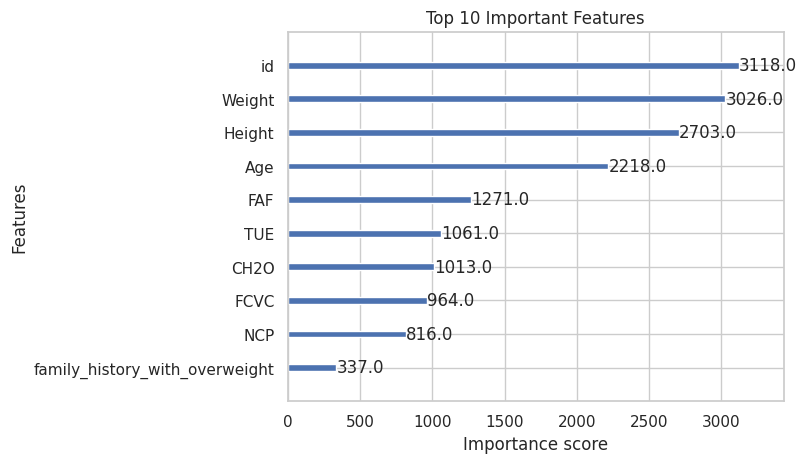

In [78]:
plt.figure(figsize=(8,6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()

In [79]:
predictions_encoded = xgb_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Gender: object, family_history_with_overweight: object, FAVC: object, CAEC: object, SMOKE: object, SCC: object, CALC: object, MTRANS: object

### **XGB with Kfold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', # Objective function for multi-class classification
    num_class=num_classes,     # Specify number of classes
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss'     # Evaluation metric for multi-class
)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

### **XGB Hyper Parameter Tuning using Randomized SearchCV**

In [ ]:
param_dist = {
    "n_estimators": [200, 300, 400, 500, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "max_depth": [4, 5, 6, 7, 8],
    "min_child_weight": [1, 2, 3, 4],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.05, 0.1],
    "reg_lambda": [0.5, 1.0, 1.5, 2.0]
}

# xgb_clf = xgb.XGBClassifier(
#     objective="multi:softprob",
#     num_class=num_classes,
#     eval_metric="mlogloss",
#     use_label_encoder=False,
#     random_state=42
# )

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring="accuracy",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y_encoded)
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)
print(f"Best CV Accuracy: {random_search.best_score_:.4f}")

# Evaluate on test split
# best_xgb = random_search.best_estimator_
# y_pred_best = best_xgb.predict(X_test)
# print(f"🎯 Test Accuracy after Random Search: {accuracy_score(y_test_encoded, y_pred_best):.4f}")

In [ ]:
# predictions_encoded = best_xgb.predict(test_copy)
# predictions_original = target_le.inverse_transform(predictions_encoded)

# # Create a new DataFrame for the submission
# submission_df = pd.DataFrame({
#     'id': test_ids,
#     'WeightCategory': predictions_original
# })

# submission_df.to_csv('submission.csv', index=False)

# print("Submission file 'submission.csv' created successfully!")

### **Optuma**

In [ ]:
!pip install optuna

In [ ]:
import optuna

# --- Define Optuna Objective Function ---
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1500, 3000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03, log=False),
        "max_depth": trial.suggest_int("max_depth", 6, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
        "gamma": trial.suggest_float("gamma", 0.1, 0.7, log=False),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9, log=False),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.8, log=False),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 1.0, log=False),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 1.0, log=False),
        "objective": "multi:softprob",  # Softprob gives probabilities
        "num_class": len(np.unique(y)), # Set dynamically based on your target 'y'
        "eval_metric": "mlogloss",
        "use_label_encoder": False,
        "n_jobs": -1,
        "random_state": 42
    }

    model = xgb.XGBClassifier(**params)

    # 5-fold Stratified Cross-validation for robustness
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in skf.split(X, y_encoded):
        X_t, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_t, y_te = y_encoded[train_idx], y_encoded[test_idx]
        model.fit(X_t, y_t)
        preds = model.predict(X_te)
        scores.append(accuracy_score(y_te, preds))

    return np.mean(scores)

# --- Run Optuna Study ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=120, show_progress_bar=True)

# --- Train Best Model ---
best_params = study.best_params
print("\nBest Hyperparameters found by Optuna:")
for k, v in best_params.items():
    print(f"{k}: {v}")

# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X, y_encoded)
# y_pred = best_model.predict(test_copy)

# acc = accuracy_score(y_val, y_pred)
# print(f"\n📈 Validation Accuracy after Optuna Tuning: {acc * 100:.2f}%")

In [ ]:
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(**best_params)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

In [ ]:
predictions_encoded = xgb_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)
# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")